## **Obesity Risk Type Prediction**

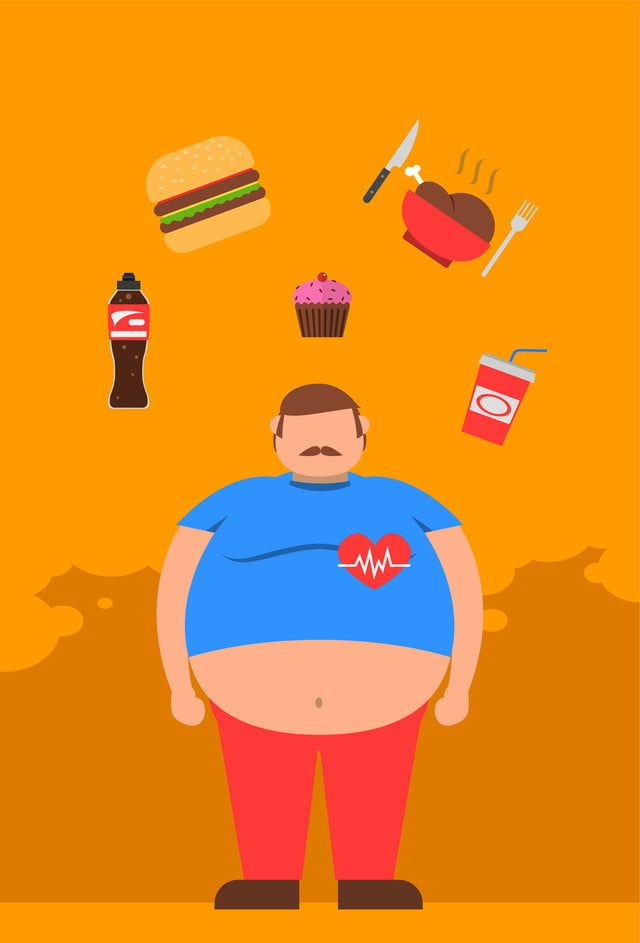
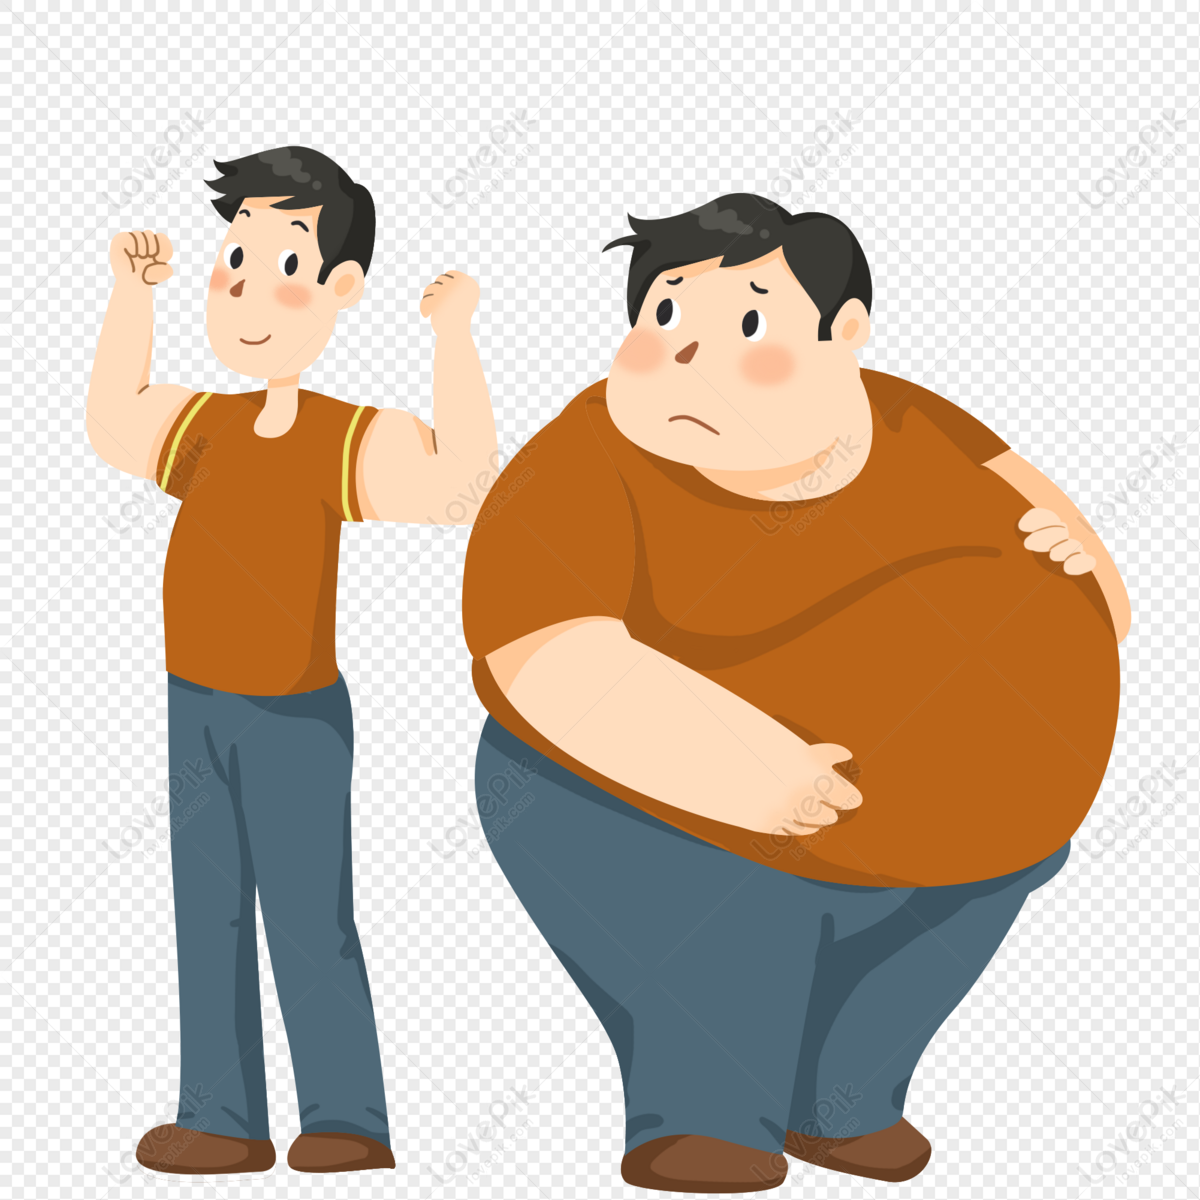
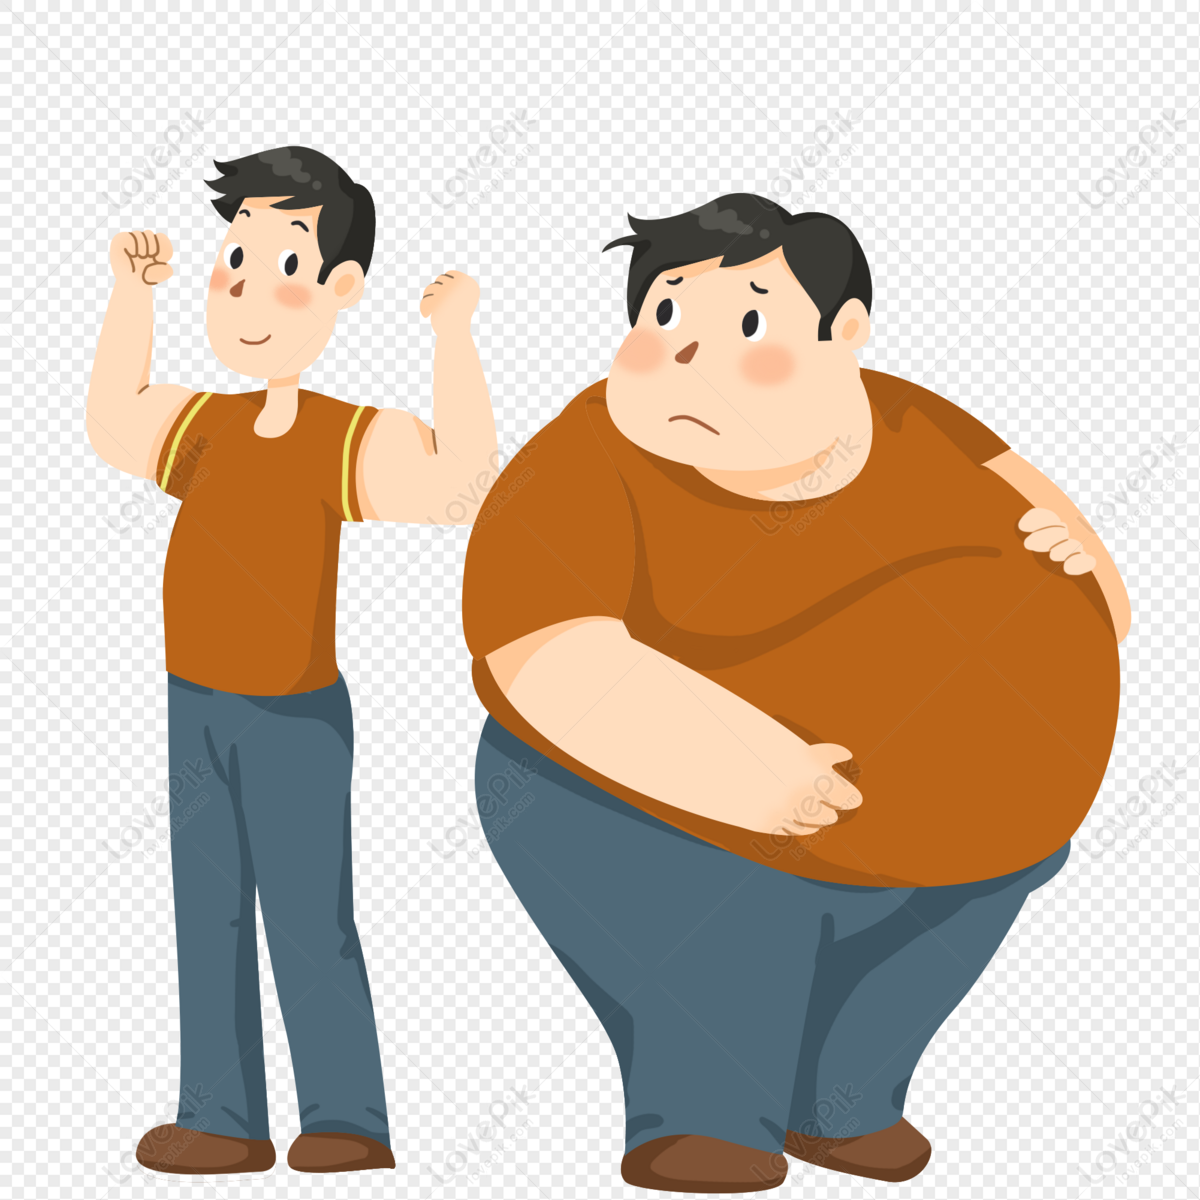
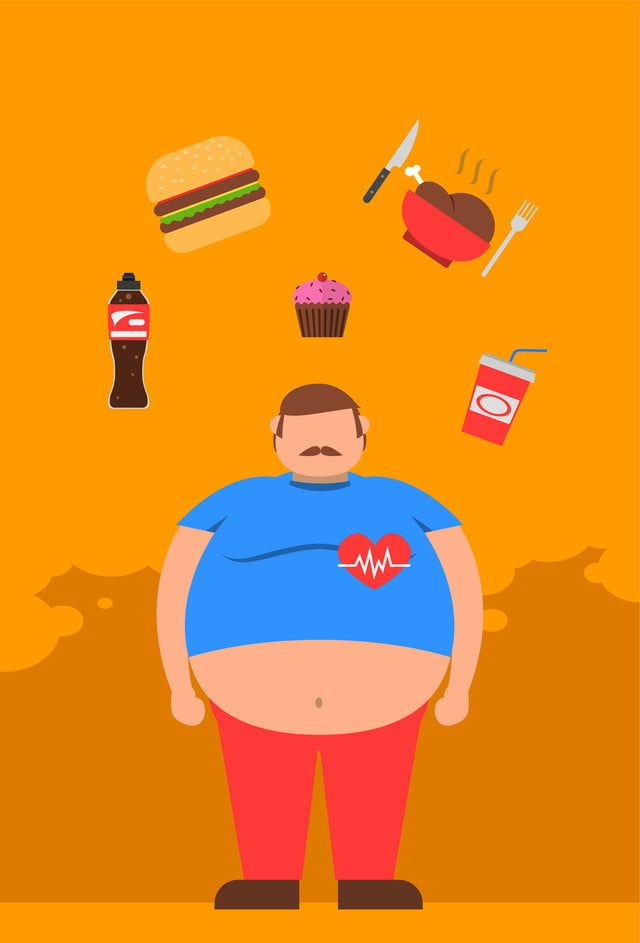

## **Introduction**
Obesity is a major health concern worldwide, linked to various chronic diseases such as diabetes, hypertension, and cardiovascular disorders. Predicting obesity levels based on lifestyle and physiological factors can help in early intervention and health awareness.  

This project applies machine learning techniques to classify individuals into different obesity categories based on various personal and lifestyle attributes.  

---

## **Aim of the Project**
The goal of this project is to develop a classification model that can accurately predict the obesity level of individuals using features such as age, weight, height, eating habits, physical activity, and transportation mode. We will analyze the dataset, perform feature engineering, apply different classification algorithms, and compare their performance to determine the best model.

---

## **Dataset Explanation**
The dataset contains various personal, behavioral, and physiological features related to obesity classification. Below is a description of the columns in the dataset:

| Column Name                      | Description |
|----------------------------------|-------------|
| **id**                           | Unique identifier for each individual. |
| **Gender**                       | The gender of the individual (Male/Female). |
| **Age**                           | Age of the person in years. |
| **Height**                        | Height of the individual in meters. |
| **Weight**                        | Weight of the individual in kilograms. |
| **family_history_with_overweight** | Whether the individual has a family history of overweight (yes/no). |
| **FAVC**                          | Frequent consumption of high-calorie food (yes/no). |
| **FCVC**                          | Frequency of vegetable consumption (scale from 1 to 3). |
| **NCP**                           | Number of main meals consumed per day. |
| **CAEC**                          | Frequency of eating between meals (Sometimes, Frequently, Always, No). |
| **SMOKE**                         | Whether the person smokes (yes/no). |
| **CH2O**                          | Daily water consumption in liters. |
| **SCC**                           | Whether the individual monitors calorie consumption (yes/no). |
| **FAF**                           | Physical activity frequency (scale from 0 to 3). |
| **TUE**                           | Time spent using technology devices (scale from 0 to 2). |
| **CALC**                          | Alcohol consumption frequency (Sometimes, Frequently, Always, No). |
| **MTRANS**                        | Mode of transportation used (Public Transportation, Automobile, Walking, etc.). |
| **NObeyesdad**                    | Target variable: Obesity classification level (e.g., Normal Weight, Obesity Type I, Overweight Level II, etc.). |

## Requirements

In [2]:
import pandas as pd
pd.set_option('display.max_columns',100)
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import BernoulliNB 
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from sklearn.preprocessing import normalize, scale
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score

## Import Data

In [3]:
df=pd.read_csv('/kaggle/input/playground-series-s4e2/train.csv')

## EDA (Exploratory Data Analysis)

In [4]:
df.head()

,id,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,0,Male,24.443011,1.699998,81.669950,yes,yes,2.000000,2.983297,Sometimes,no,2.763573,no,0.000000,0.976473,Sometimes,Public_Transportation,Overweight_Level_II
1,1,Female,18.000000,1.560000,57.000000,yes,yes,2.000000,3.000000,Frequently,no,2.000000,no,1.000000,1.000000,no,Automobile,Normal_Weight
2,2,Female,18.000000,1.711460,50.165754,yes,yes,1.880534,1.411685,Sometimes,no,1.910378,no,0.866045,1.673584,no,Public_Transportation,Insufficient_Weight
3,3,Female,20.952737,1.710730,131.274851,yes,yes,3.000000,3.000000,Sometimes,no,1.674061,no,1.467863,0.780199,Sometimes,Public_Transportation,Obesity_Type_III
4,4,Male,31.641081,1.914186,93.798055,yes,yes,2.679664,1.971472,Sometimes,no,1.979848,no,1.967973,0.931721,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
df.shape

(20758, 18)

In [6]:
df.isnull().sum()

id                                0
Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20758 entries, 0 to 20757
Data columns (total 18 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              20758 non-null  int64  
 1   Gender                          20758 non-null  object 
 2   Age                             20758 non-null  float64
 3   Height                          20758 non-null  float64
 4   Weight                          20758 non-null  float64
 5   family_history_with_overweight  20758 non-null  object 
 6   FAVC                            20758 non-null  object 
 7   FCVC                            20758 non-null  float64
 8   NCP                             20758 non-null  float64
 9   CAEC                            20758 non-null  object 
 10  SMOKE                           20758 non-null  object 
 11  CH2O                            20758 non-null  float64
 12  SCC                             

In [8]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
id,20758.0,10378.500000,5992.462780,0.00,5189.250000,10378.500000,15567.750000,20757.000000
Age,20758.0,23.841804,5.688072,14.00,20.000000,22.815416,26.000000,61.000000
Height,20758.0,1.700245,0.087312,1.45,1.631856,1.700000,1.762887,1.975663
Weight,20758.0,87.887768,26.379443,39.00,66.000000,84.064875,111.600553,165.057269
FCVC,20758.0,2.445908,0.533218,1.00,2.000000,2.393837,3.000000,3.000000
NCP,20758.0,2.761332,0.705375,1.00,3.000000,3.000000,3.000000,4.000000
CH2O,20758.0,2.029418,0.608467,1.00,1.792022,2.000000,2.549617,3.000000
FAF,20758.0,0.981747,0.838302,0.00,0.008013,1.000000,1.587406,3.000000
TUE,20758.0,0.616756,0.602113,0.00,0.000000,0.573887,1.000000,2.000000


In [56]:
df['NObeyesdad'].unique()

array(['Overweight_Level_II', 'Normal_Weight', 'Insufficient_Weight',
       'Obesity_Type_III', 'Obesity_Type_II', 'Overweight_Level_I',
       'Obesity_Type_I'], dtype=object)

## Data Visaulization

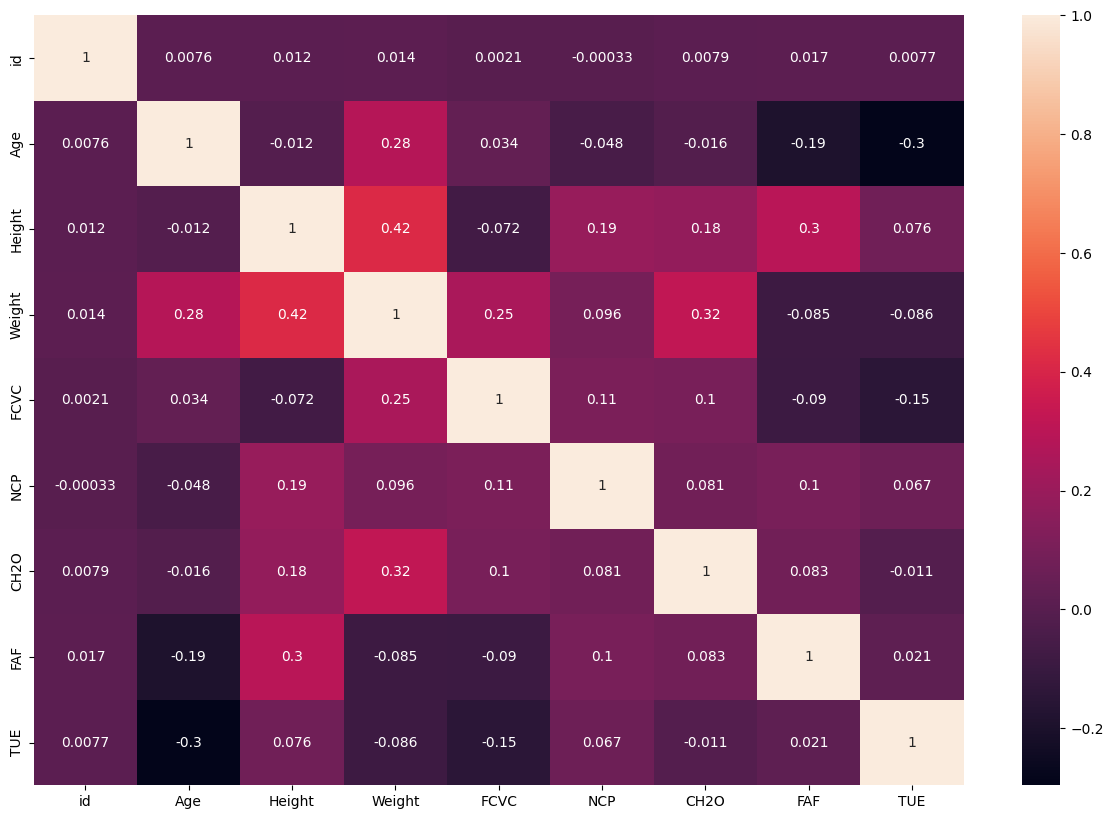

In [103]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(numeric_only=True),annot=True);

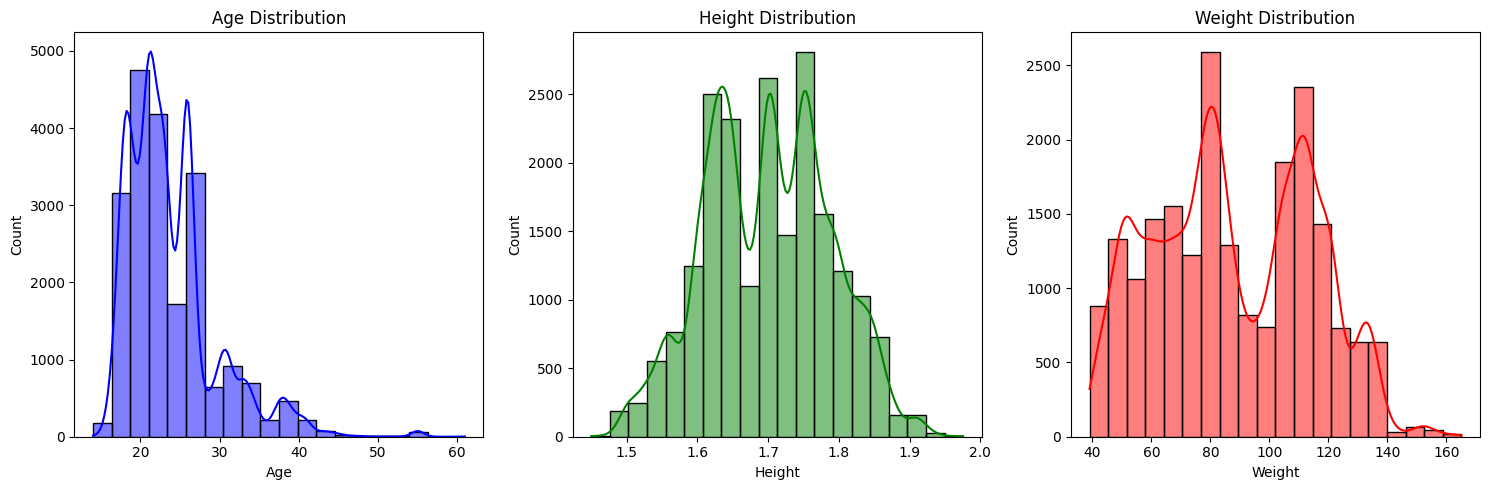

In [75]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.histplot(df['Age'], bins=20, kde=True, ax=axes[0], color='blue')
axes[0].set_title("Age Distribution")

sns.histplot(df['Height'], bins=20, kde=True, ax=axes[1], color='green')
axes[1].set_title("Height Distribution")

sns.histplot(df['Weight'], bins=20, kde=True, ax=axes[2], color='red')
axes[2].set_title("Weight Distribution")

plt.tight_layout()
plt.show()


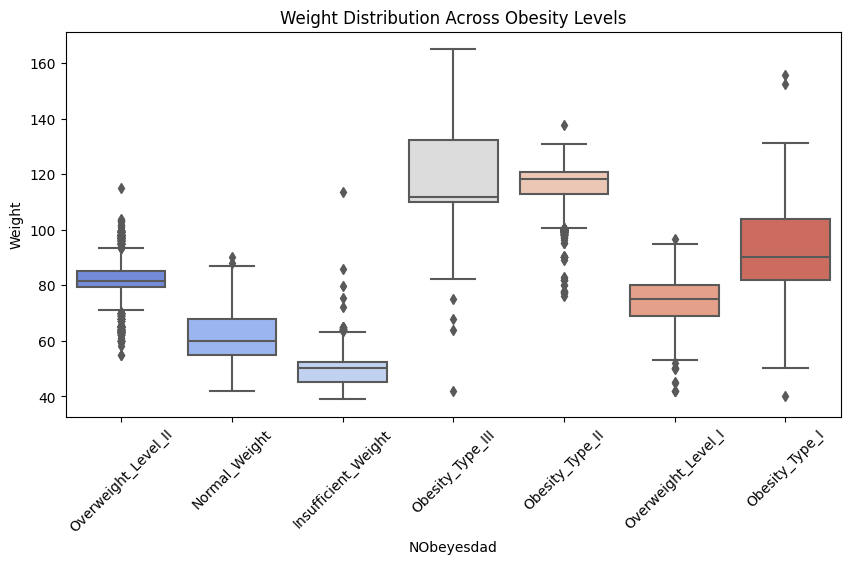

In [76]:
plt.figure(figsize=(10, 5))
sns.boxplot(x='NObeyesdad', y='Weight', data=df, palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Weight Distribution Across Obesity Levels")
plt.show()

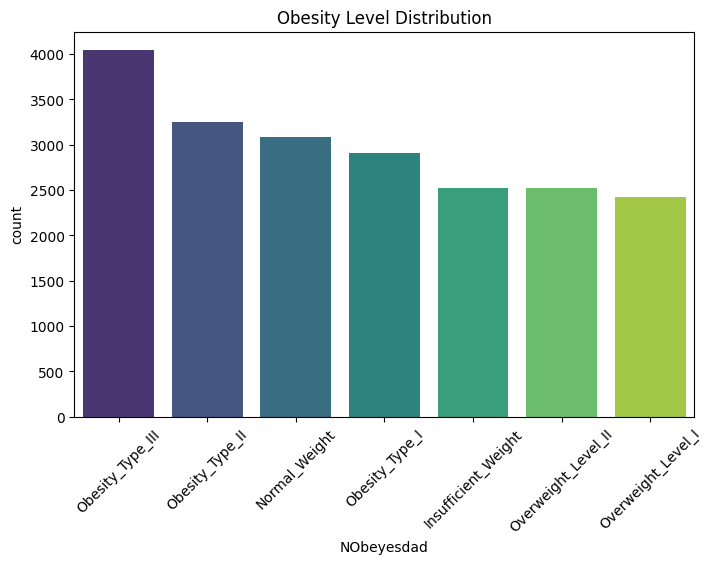

In [77]:
plt.figure(figsize=(8, 5))
sns.countplot(x='NObeyesdad', data=df, palette="viridis", order=df['NObeyesdad'].value_counts().index)
plt.xticks(rotation=45)
plt.title("Obesity Level Distribution")
plt.show()

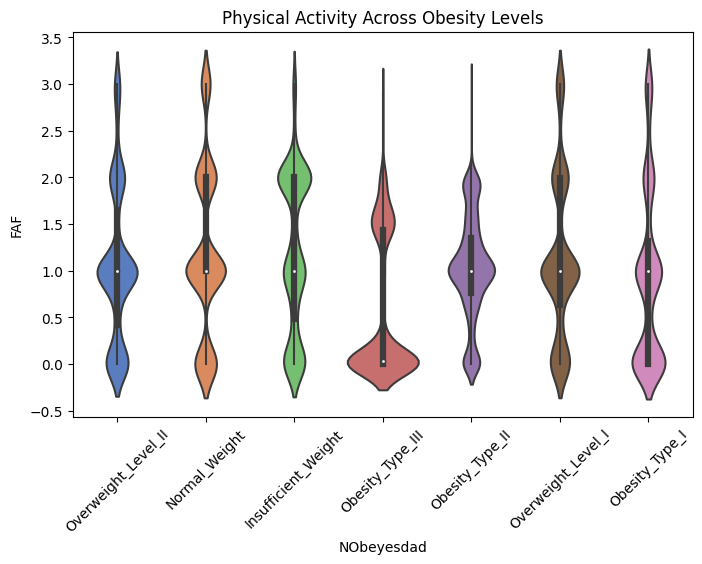

In [78]:
plt.figure(figsize=(8, 5))
sns.violinplot(x='NObeyesdad', y='FAF', data=df, palette="muted")
plt.xticks(rotation=45)
plt.title("Physical Activity Across Obesity Levels")
plt.show()

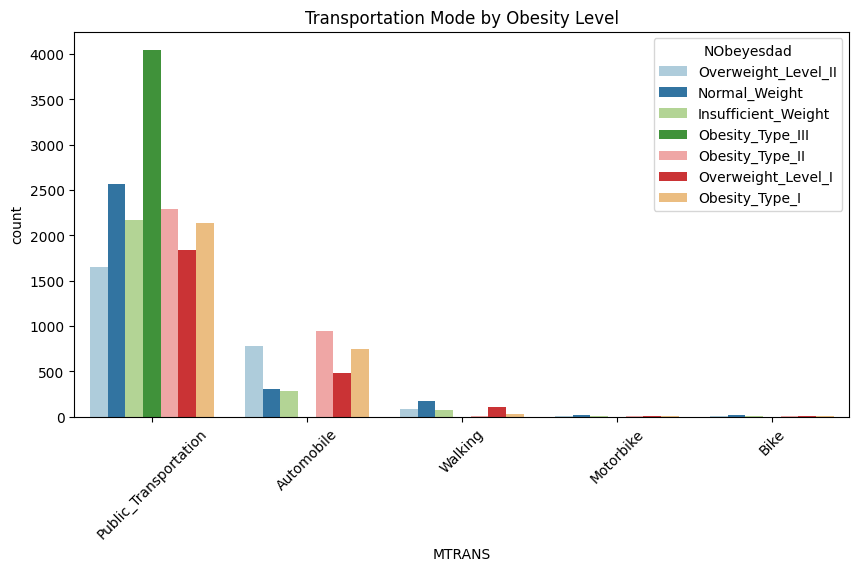

In [79]:
plt.figure(figsize=(10, 5))
sns.countplot(x="MTRANS", hue="NObeyesdad", data=df, palette="Paired")
plt.xticks(rotation=45)
plt.title("Transportation Mode by Obesity Level")
plt.show()

## Modelling with Conversational Algorithms

In [88]:
x=df.drop(['id','NObeyesdad'],axis=1)
y=df[['NObeyesdad']]

In [89]:
x=pd.get_dummies(x,drop_first=True)

In [92]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import lightgbm as lgb

def classification_algo(x, y, confusion_mtr=False, classification_rpt=False):
    g = GaussianNB()
    b = BernoulliNB()
    l = LogisticRegression()
    d = DecisionTreeClassifier()
    rf = RandomForestClassifier()
    h = GradientBoostingClassifier()
    k = KNeighborsClassifier()
    lgbm = LGBMClassifier(verbose=-1)  

    algos = [g, b, l, d, rf, h, k, lgbm]
    algo_names = ['Gaussian NB', 'Bernoulli NB', 'Logistic Regression', 
                  'Decision Tree Classifier', 'Random Forest Classifier', 
                  'Gradient Boosting Classifier', 'KNeighbors Classifier',
                  'LightGBM Classifier'] 

    accuracy = []
    confusion = []
    classification = []
    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

    # Prepare a DataFrame to store results
    result = pd.DataFrame(columns=['Accuracy Score', 'Confusion Matrix', 'Classification Report'], 
                          index=algo_names)

    labels = sorted(y["NObeyesdad"].unique())

    for algo in algos:
        p = algo.fit(x_train, y_train).predict(x_test)
        accuracy.append(accuracy_score(y_test, p))
        confusion.append(confusion_matrix(y_test, p, labels=labels))
        classification.append(classification_report(y_test, p))

    # Store results
    result['Accuracy Score'] = accuracy
    result['Confusion Matrix'] = confusion
    result['Classification Report'] = classification

    # Sort results by accuracy
    r_table = result.sort_values('Accuracy Score', ascending=False)
    
    if confusion_mtr:
        for index, row in r_table.iterrows():
            confusion_mat = np.array(row['Confusion Matrix'])
            print(f"Confusion Matrix of {index}")
            plt.figure(figsize=(5, 4))
            sns.heatmap(confusion_mat, annot=True, fmt="d", 
                        xticklabels=labels, yticklabels=labels, cmap="Blues")
            plt.xlabel("Predicted Labels")
            plt.ylabel("True Labels")
            plt.show()
    
    if classification_rpt:
        for index, row in r_table.iterrows():
            print(f"Classification Report of {index}:")
            print(row['Classification Report'])

    return r_table[['Accuracy Score']]

Confusion Matrix of LightGBM Classifier


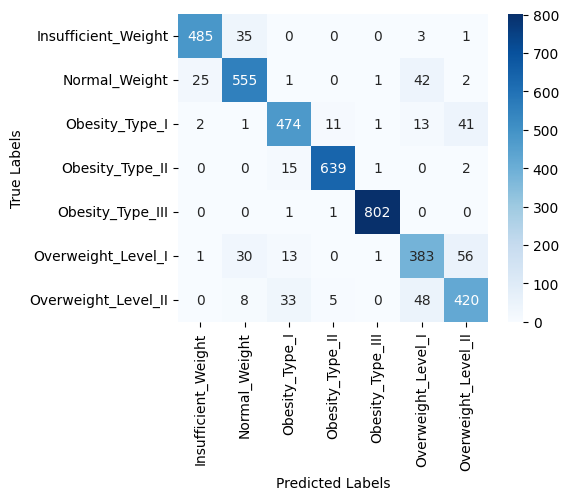

Confusion Matrix of Gradient Boosting Classifier


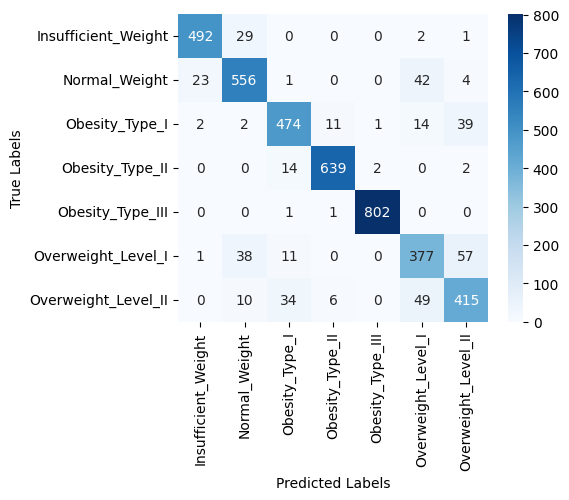

Confusion Matrix of Random Forest Classifier


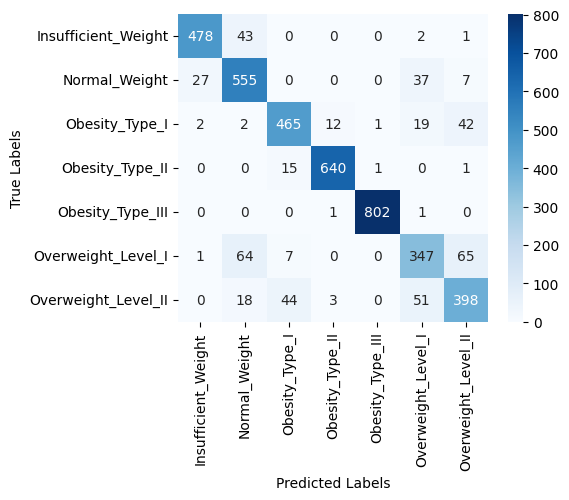

Confusion Matrix of Decision Tree Classifier


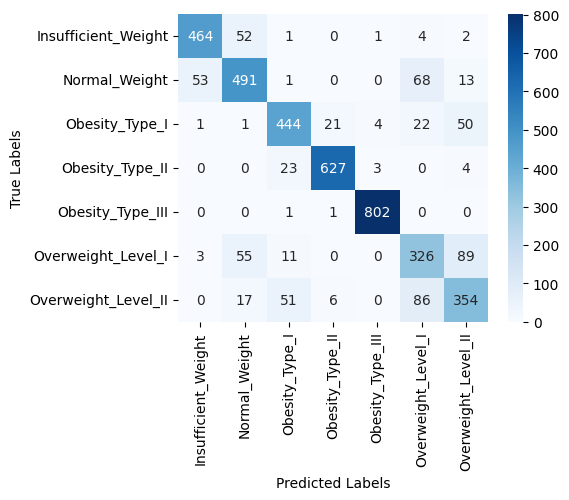

Confusion Matrix of KNeighbors Classifier


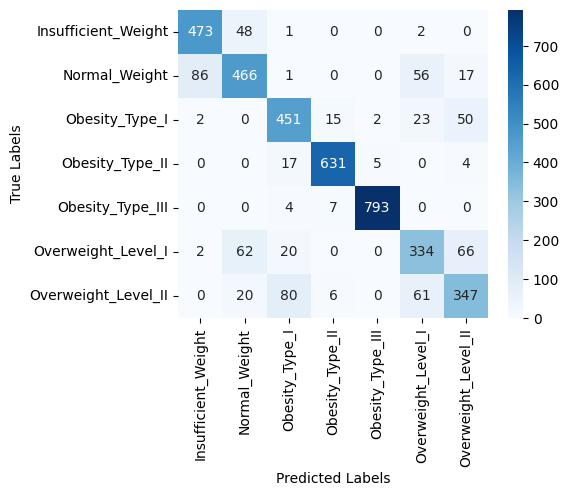

Confusion Matrix of Logistic Regression


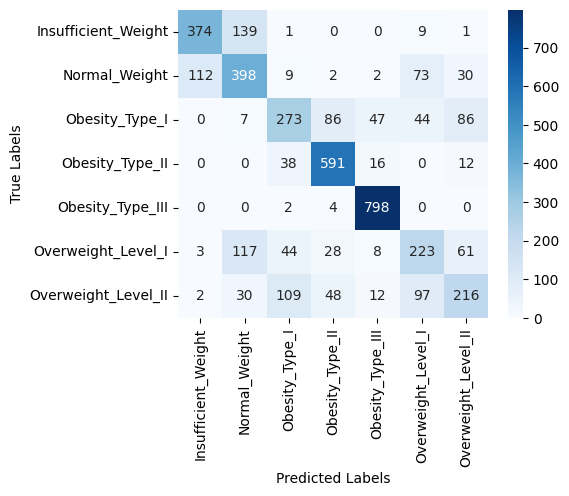

Confusion Matrix of Gaussian NB


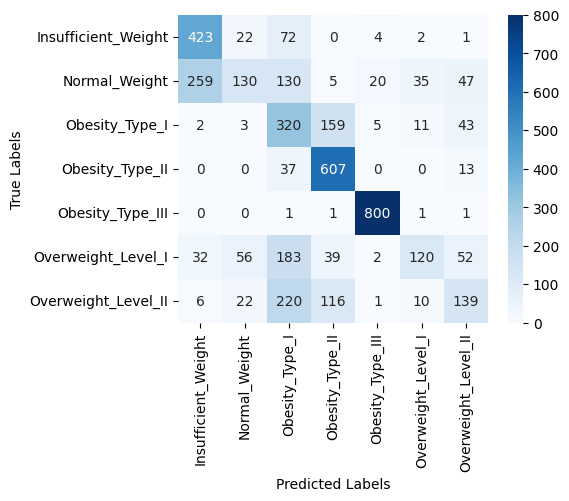

Confusion Matrix of Bernoulli NB


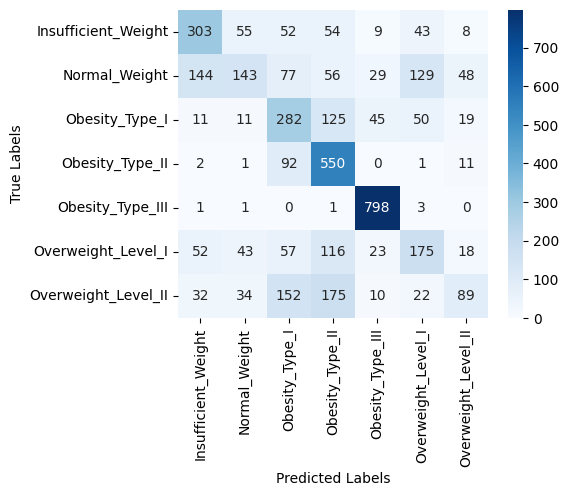

Classification Report of LightGBM Classifier:
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.93      0.94       524
      Normal_Weight       0.88      0.89      0.88       626
     Obesity_Type_I       0.88      0.87      0.88       543
    Obesity_Type_II       0.97      0.97      0.97       657
   Obesity_Type_III       1.00      1.00      1.00       804
 Overweight_Level_I       0.78      0.79      0.79       484
Overweight_Level_II       0.80      0.82      0.81       514

           accuracy                           0.91      4152
          macro avg       0.90      0.89      0.90      4152
       weighted avg       0.91      0.91      0.91      4152

Classification Report of Gradient Boosting Classifier:
                     precision    recall  f1-score   support

Insufficient_Weight       0.95      0.94      0.94       524
      Normal_Weight       0.88      0.89      0.88       626
     Obesity_Type_I       0.89      0.87 

,Accuracy Score
LightGBM Classifier,0.905106
Gradient Boosting Classifier,0.904383
Random Forest Classifier,0.887524
Decision Tree Classifier,0.844894
KNeighbors Classifier,0.841763
Logistic Regression,0.691956
Gaussian NB,0.611513
Bernoulli NB,0.563584


In [93]:
classification_algo(x,y,confusion_mtr=True,classification_rpt=True)

## Testing the Best Conversational Model

In [36]:
x=df.drop(['id','NObeyesdad'],axis=1)
y=df[['NObeyesdad']]
x=pd.get_dummies(x,drop_first=True)

In [94]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=42)
lgbm = LGBMClassifier(verbose=-1)  
model=lgbm.fit(x_train,y_train)
predictions=model.predict(x_test)
score=accuracy_score(y_test,predictions)
score

0.9051059730250481

In [95]:
import joblib
joblib.dump(model, 'classification_model.pkl')

['classification_model.pkl']

In [96]:
df_test=pd.read_csv('/kaggle/input/playground-series-s4e2/test.csv')

In [97]:
submission=pd.DataFrame({
    'id':df_test['id']
})

In [98]:
df_test=df_test.drop(['id'],axis=1)

In [99]:
df_test=pd.get_dummies(df_test,drop_first=True)
df_test = df_test.reindex(columns=x.columns, fill_value=0)

In [100]:
predictions=model.predict(df_test)

In [101]:
submission['NObeyesdad']=predictions

In [102]:
submission.to_csv('submission.csv',index=False)

## **Conclusion**
Based on the accuracy scores, the **LightGBM Classifier** performed the best with an accuracy of **90.51%**, closely followed by the **Gradient Boosting Classifier** at **90.44%**. These models performed significantly better than others, such as the **Logistic Regression** and **Naive Bayes** classifiers, which had lower accuracy.

Overall, **LightGBM** emerged as the optimal model for predicting obesity levels in this dataset. Future work can explore further hyperparameter tuning, feature engineering, and other techniques such as cross-validation to potentially improve the model's performance even more.

By accurately predicting obesity levels, this model can be useful in health interventions, targeting individuals at risk of obesity-related health issues.
